### Installation and Importation of Necessary Libraries


In [5]:
# -- imports pandas library 
import pandas as pd

# -- imports regex (regular expression) library 
import re

# -- import numpy library for working with arrays

import numpy as np

# -- imports matplotlib library for the data visualization

import matplotlib.pyplot as plt

# -- import the Seaborn library for statistical data visualization

import seaborn as sns

# -- imports gradient boosting algorithm Library

import xgboost as xgb

# -- imports evaluation metrics for the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -- imports joblib for saving the model

import joblib

# -- imports stats library for the removal of Outliers Using Z-Score

from scipy import stats


### Loading and Visualization of The Time Series Data

### Reading the CSV File into the Current Programming Environment

In [8]:
# import and read CSV file to a dataframe called "initial_dataset"

file_path = 'Time Series Energy Consumption.csv' # path to the file on local disk
initial_dataset = pd.read_csv(file_path) # reads the file content into the variable "initial_dataset"


In [9]:
# displays the first 5 rows of thr dataset

initial_dataset.head()

# initial_dataset # display the whole dataset

,Datetime,Energy_Consumption
0,12/31/2004 1:00,13478
1,12/31/2004 2:00,12865
2,12/31/2004 3:00,12577
3,12/31/2004 4:00,12517
4,12/31/2004 5:00,12670


In [10]:
# displays the last 5 rows of thr dataset

initial_dataset.tail()

# initial_dataset # display the whole dataset

,Datetime,Energy_Consumption
121268,1/1/2018 20:00,21089
121269,1/1/2018 21:00,20999
121270,1/1/2018 22:00,20820
121271,1/1/2018 23:00,20415
121272,1/2/2018 0:00,19993


In [11]:
# prints out the shape of the data

print(f" Shape of Dataset: {initial_dataset.shape}")

 Shape of Dataset: (121273, 2)


### Visualizing the Time Series Plot

The Energy Consumption is plotted over different period to get a general overview of the trends in energy consumption over the span of 14 years from 2004 to 2008

##### Energy Consumption Plot (MW)

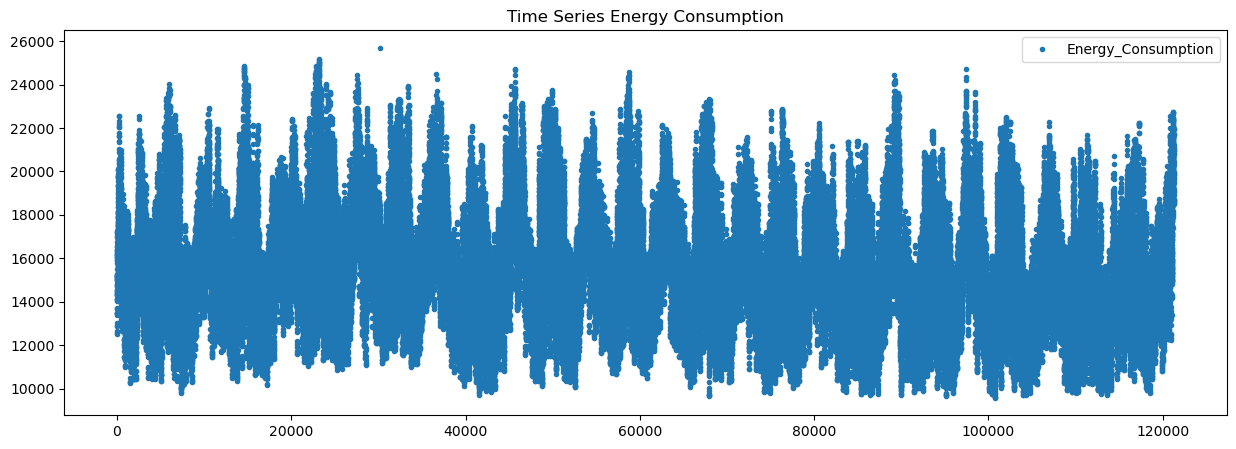

In [14]:
# plotting the time-series graph

color_pal = sns.color_palette()
# plt.style.use("fivethirtyeight")
initial_dataset.plot(style= '.', 
                     figsize = (15, 5), color = color_pal[0], 
                     title = "Time Series Energy Consumption")
plt.show()

##### Energy Consumption (MW) by Datetime

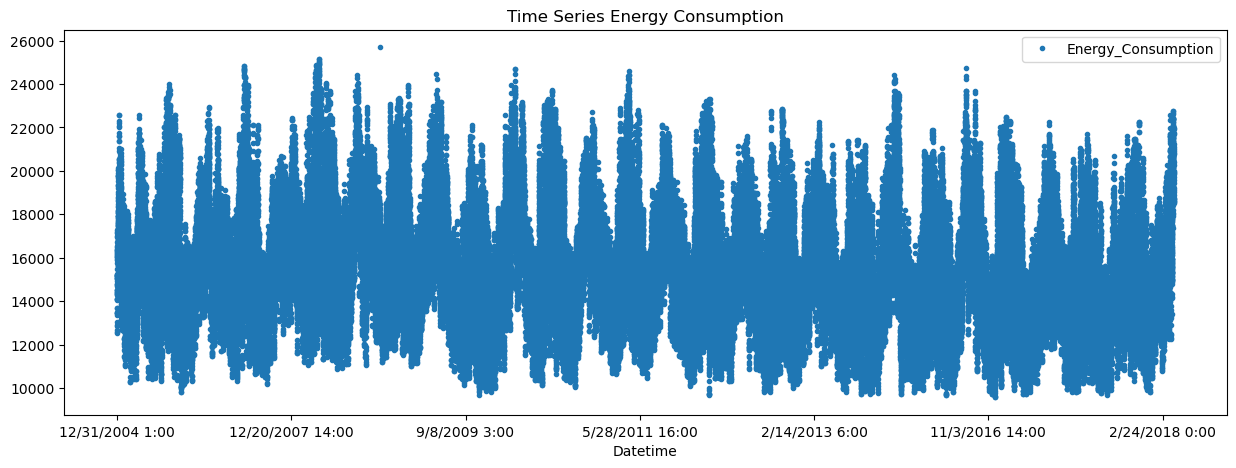

In [16]:
# plotting the time-series graph

color_pal = sns.color_palette()
# plt.style.use("fivethirtyeight")
initial_dataset.plot(x = 'Datetime', y = 'Energy_Consumption', style= '.', 
                     figsize = (15, 5), color = color_pal[0], 
                     title = "Time Series Energy Consumption")
plt.show()

### Data Cleaning and Pre-processing

### Checking and Handling Duplicates in the Dataset

In [19]:
# Find and print number of duplicate timestamps in the Datetime column
duplicates = initial_dataset[initial_dataset.duplicated(subset='Datetime', keep=False)]
print(f"Duplicates in this Dataset: {len(duplicates)}")


Duplicates in this Dataset: 8


In [20]:
# Keep only the first occurrence of each duplicate

initial_dataset = initial_dataset.drop_duplicates(subset='Datetime', keep='first')

### Getting Key Information Regarding Each Column and Checking for Null Values

In [22]:
initial_dataset.info() # displays key information regarding each columns.

# Check for missing values in the entire DataFrame
missing_values = initial_dataset.isnull().sum() # checks for null, empty or nan values in the whole dataset.

print(f"""

Missing Values: 
{missing_values}""") # prints out the number of missing values in each column.

<class 'pandas.core.frame.DataFrame'>
Index: 121269 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Datetime            121269 non-null  object
 1   Energy_Consumption  121269 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


Missing Values: 
Datetime              0
Energy_Consumption    0
dtype: int64


#### Observation

After careful observation of the dataset, no missing values (such as nan, null or empty cells) were detected, so there wasn't a need to do any further actions like handling of the missing values.

### Setting the Datetime Column as the Index of the Dataframe and Converting it to a "Datetime" Object

In [25]:
# sets the "date-time" column as the index of the dataframe 

initial_dataset = initial_dataset.set_index("Datetime")
initial_dataset # displays the modified dataset



,Energy_Consumption
Datetime,
12/31/2004 1:00,13478
12/31/2004 2:00,12865
12/31/2004 3:00,12577
12/31/2004 4:00,12517
12/31/2004 5:00,12670
...,...
1/1/2018 20:00,21089
1/1/2018 21:00,20999
1/1/2018 22:00,20820


In [26]:
# converts the index column (i.e "date-time") to a "DatetimeIndex" datatype

initial_dataset.index = pd.to_datetime(initial_dataset.index) 
initial_dataset # displays the modified dataframe

# NOTE: Converting it to a datetime datatype makes it easier to draw insights from the time series plot

,Energy_Consumption
Datetime,
2004-12-31 01:00:00,13478
2004-12-31 02:00:00,12865
2004-12-31 03:00:00,12577
2004-12-31 04:00:00,12517
2004-12-31 05:00:00,12670
...,...
2018-01-01 20:00:00,21089
2018-01-01 21:00:00,20999
2018-01-01 22:00:00,20820


### Sets the Datatime Index Column to be Ordered Hourly and Sorted in Ascending Order

In [28]:
# Resample hourly, ensuring continuous hourly data for each day
initial_dataset = initial_dataset.resample('h').asfreq()
initial_dataset.head()

,Energy_Consumption
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0


In [29]:
 # sorts Datetime index column in ascending order

initial_dataset = initial_dataset.sort_index()

### Plotting One Week of Data to Show the Trend in Energy Consumption

In [31]:
# taking a fraction of the data to see how energy is consumed during a specific period of time

initial_dataset.loc[(initial_dataset.index >= "2018-01-01") & (initial_dataset.index <= "2018-01-07")] # displays just one week of the data


,Energy_Consumption
Datetime,
2018-01-01 00:00:00,18687.0
2018-01-01 01:00:00,18508.0
2018-01-01 02:00:00,18600.0
2018-01-01 03:00:00,18571.0
2018-01-01 04:00:00,18686.0
...,...
2018-01-06 20:00:00,21510.0
2018-01-06 21:00:00,21653.0
2018-01-06 22:00:00,21523.0


##### Energy Consumption (MW) by Datetime for a Week

<Axes: title={'center': 'One Week Data'}, xlabel='Datetime'>

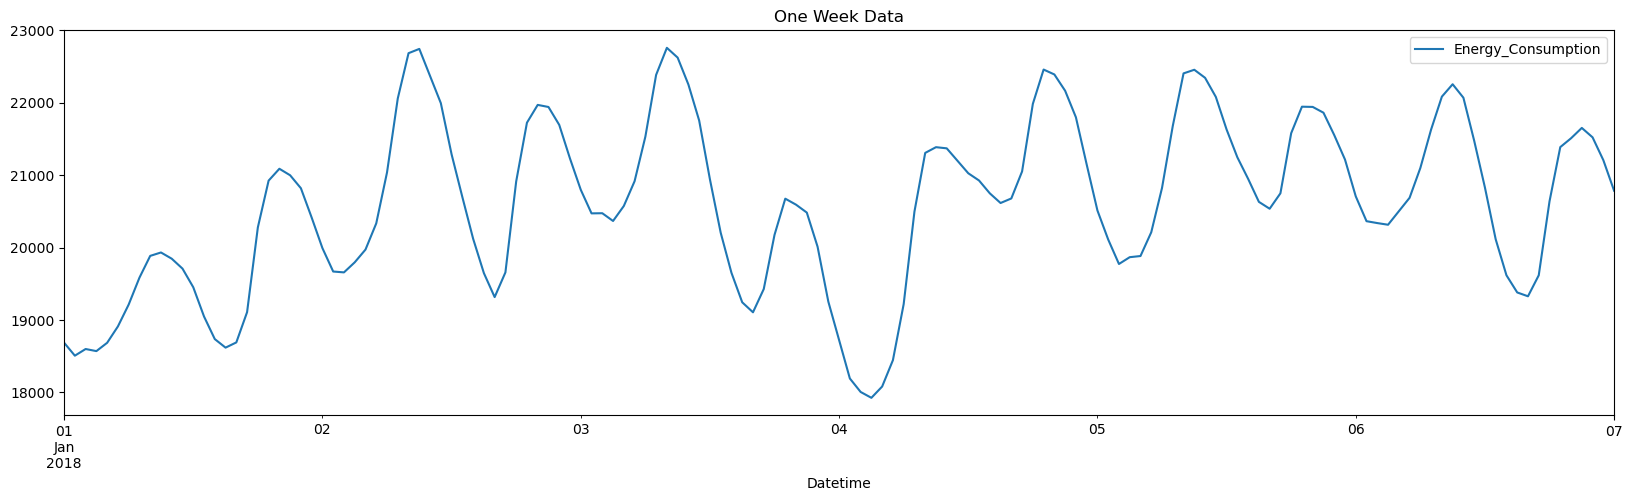

In [33]:
# plots the one week data

initial_dataset.loc[(initial_dataset.index >= "2018-01-01") & (initial_dataset.index <= "2018-01-07")].plot(figsize = (20, 5), title = "One Week Data") 


### Feature Engineering 
Feature Engineering is applied to help extract key important features from the "Datetime" feature column to enable the model better the understand the underlying trends in the dataset so that it can make more accurate prediction forecasts in the future.

In [35]:
def feature_creation(dataframe_):
    """
    Function to Create Hour, Day of Week, Day of Year, Month, Quarter and Year Features in a given Dataframe.
    # NOTE : 
    # uses 24 hr system under "hour" Column
    # 1 - January , 2 - February.... under "Month" Column
    """


    dataframe_ = dataframe_.copy() # creates a copy of the main dataframe with which edits will be made on to avoid fatal errors
    
    # creating new features
    dataframe_["Hour"] = dataframe_.index.hour # creates a separate column for hours from the "Datetime" Index column  
    dataframe_["Month"] = dataframe_.index.month # creates a separate column for month of year from the "Datetime" Index column
    dataframe_["Year"] = dataframe_.index.year # creates a separate column for Day of Year from the "Datetime" Index column

    # creating lagged features
    dataframe_["12 Hourly Average"] = dataframe_['Energy_Consumption'].rolling(window = 12).mean() # creates a lagged feature column for the average of (random) 12 hours data from the "AEP_MW" feature column
    dataframe_["24 Hourly Average"] = dataframe_['Energy_Consumption'].rolling(window = 24).mean() # creates a lagged feature column for the average of (random) 24 hours data from the "AEP_MW" feature column
    dataframe_['A Year Ago'] = dataframe_['Energy_Consumption'].shift(365) # creates a separate column for the last 365 days from the "AEP_MW" column
    
   

    return dataframe_ # returns the modified dataframe 

In [36]:
# calling the "feature_creation" function to create the new features in the dataset

initial_dataset = feature_creation(initial_dataset) # passes the "initial_dataframe" to the feature creation function

initial_dataset = initial_dataset.dropna() # drops rows with nan values

initial_dataset # displays the updated dataframe

,Energy_Consumption,Hour,Month,Year,12 Hourly Average,24 Hourly Average,A Year Ago
Datetime,,,,,,,
2004-10-16 06:00:00,12127.0,6,10,2004,13603.750000,14516.500000,12379.0
2004-10-16 07:00:00,12628.0,7,10,2004,13356.916667,14456.333333,11935.0
2004-10-16 08:00:00,13377.0,8,10,2004,13151.000000,14381.666667,11692.0
2004-10-16 09:00:00,14062.0,9,10,2004,13026.583333,14325.458333,11597.0
2004-10-16 10:00:00,14577.0,10,10,2004,12977.833333,14283.500000,11681.0
...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,20,8,2018,17407.583333,15589.541667,18441.0
2018-08-02 21:00:00,17303.0,21,8,2018,17613.333333,15624.791667,18625.0
2018-08-02 22:00:00,17001.0,22,8,2018,17754.333333,15658.291667,18860.0


### Describing the Data Using Statistical Terms

- Count: The number of observations for each feature column.
- Mean: average value for each feature column.
- Max: maximum observation in each feature column.
- Standard Deviation: 
- 25th Percentile:
- 50th Percentile / Median: 
- 75th Percentile:


In [38]:
initial_dataset.describe() # describes the whole data

,Energy_Consumption,Hour,Month,Year,12 Hourly Average,24 Hourly Average,A Year Ago
count,120256.000000,120256.000000,120256.000000,120256.000000,120256.000000,120256.000000,120256.000000
mean,15511.394267,11.501148,6.488998,2011.195516,15511.542403,15510.706105,15503.817281
std,2594.644328,6.922626,3.458715,3.998731,2217.053541,1971.554416,2594.456407
min,9581.000000,0.000000,1.000000,2004.000000,10266.750000,11070.083333,9581.000000
25%,13640.000000,5.000000,4.000000,2008.000000,13871.145833,14055.072917,13633.750000
50%,15324.000000,12.000000,6.000000,2011.000000,15277.083333,15288.166667,15315.000000
75%,17219.000000,18.000000,10.000000,2015.000000,16954.125000,16820.760417,17206.000000
max,25695.000000,23.000000,12.000000,2018.000000,24207.583333,22881.625000,25695.000000


### Checking and Handling Outliers in the Dataset Outliers

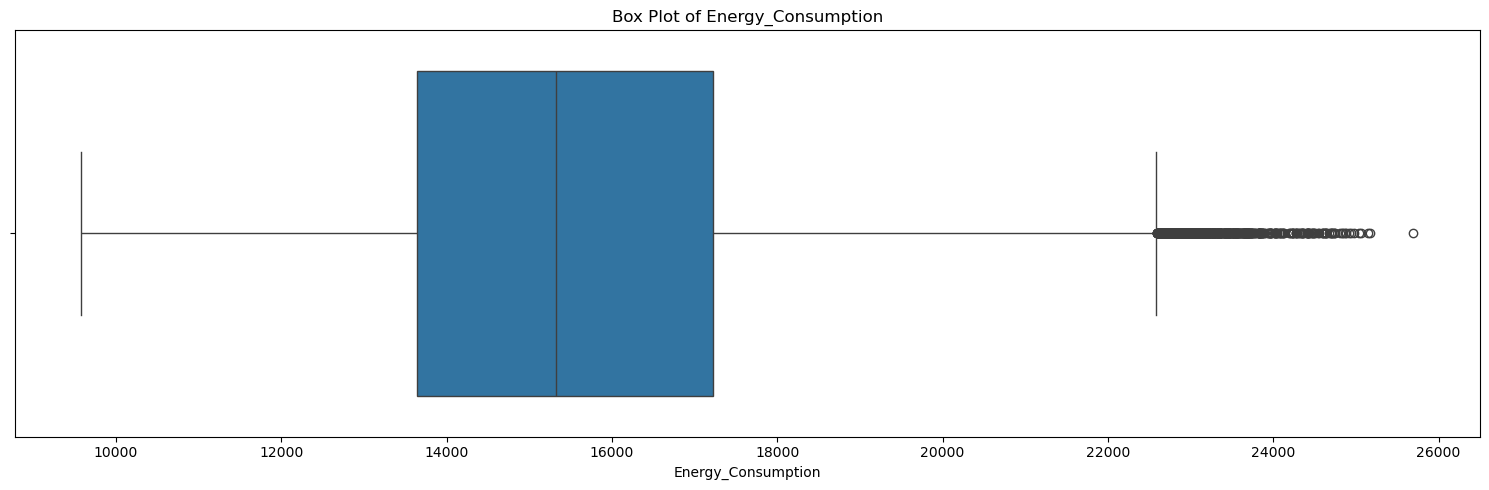

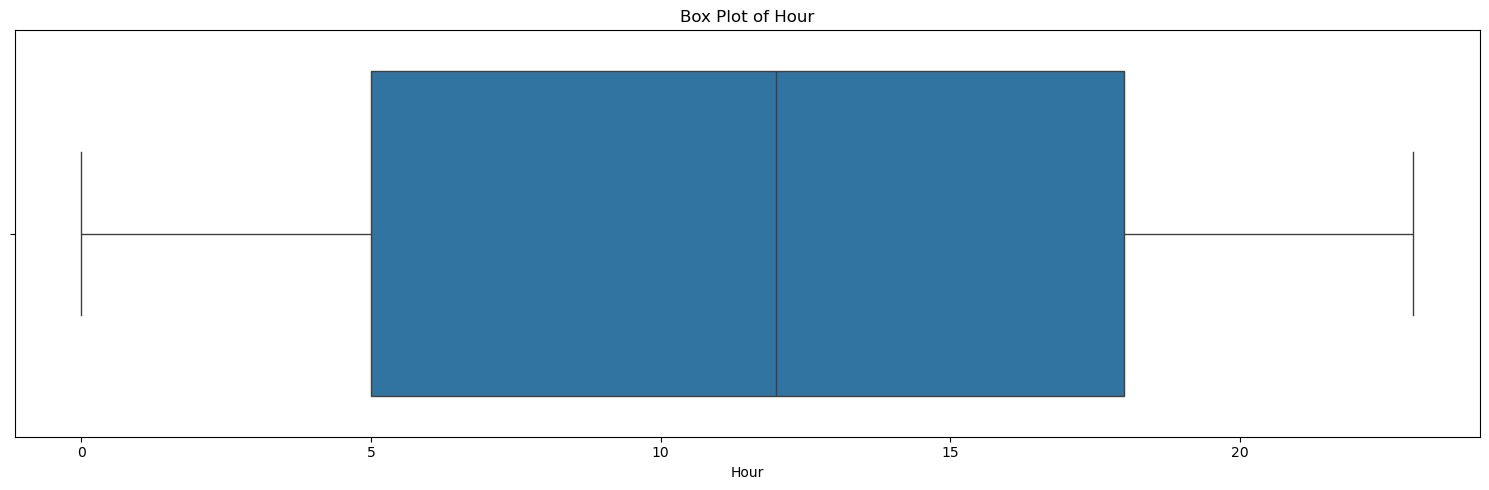

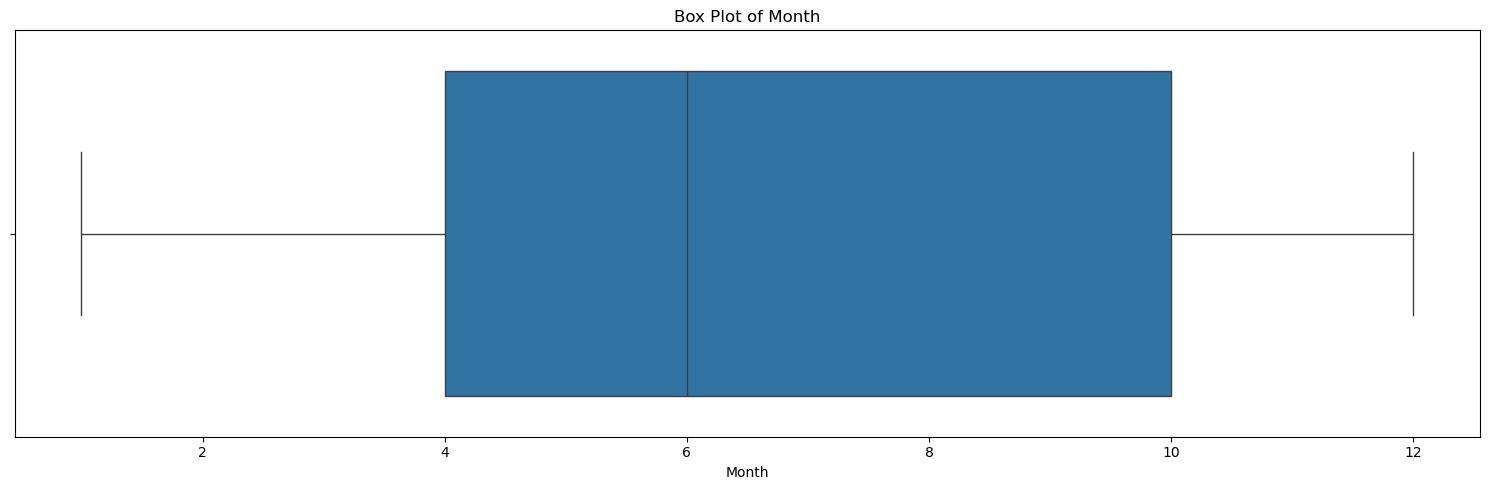

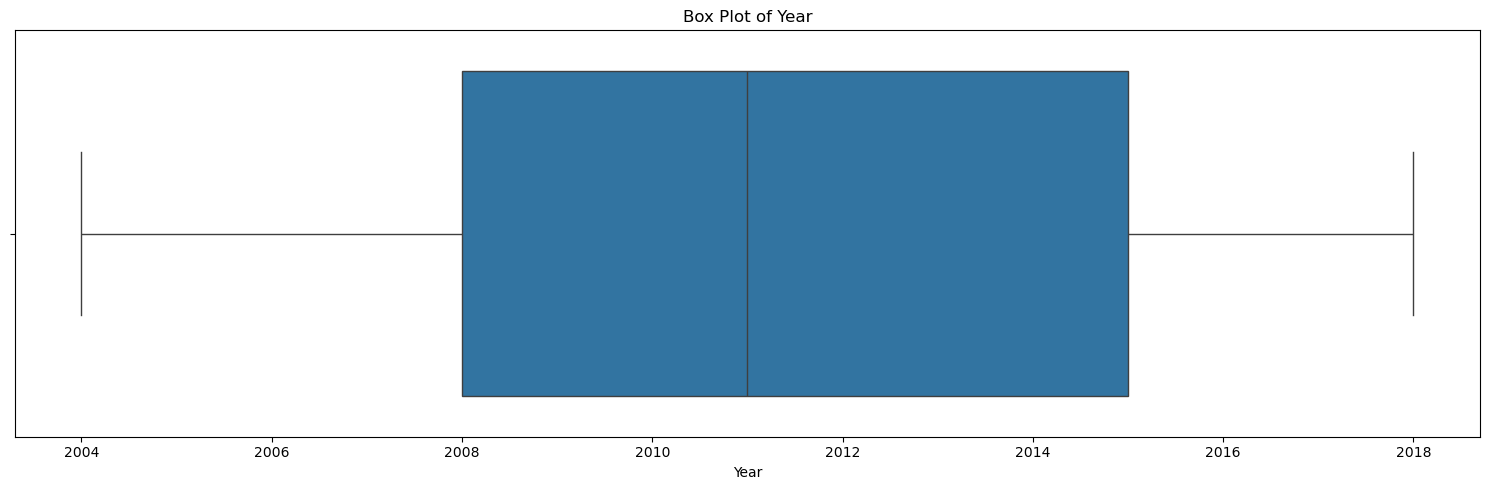

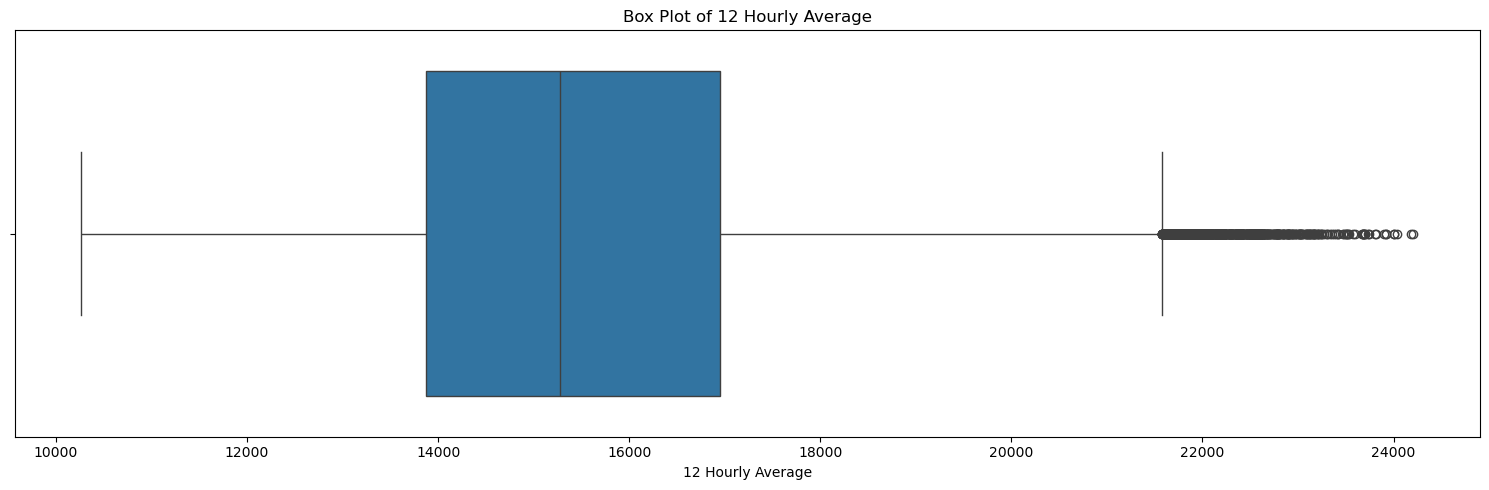

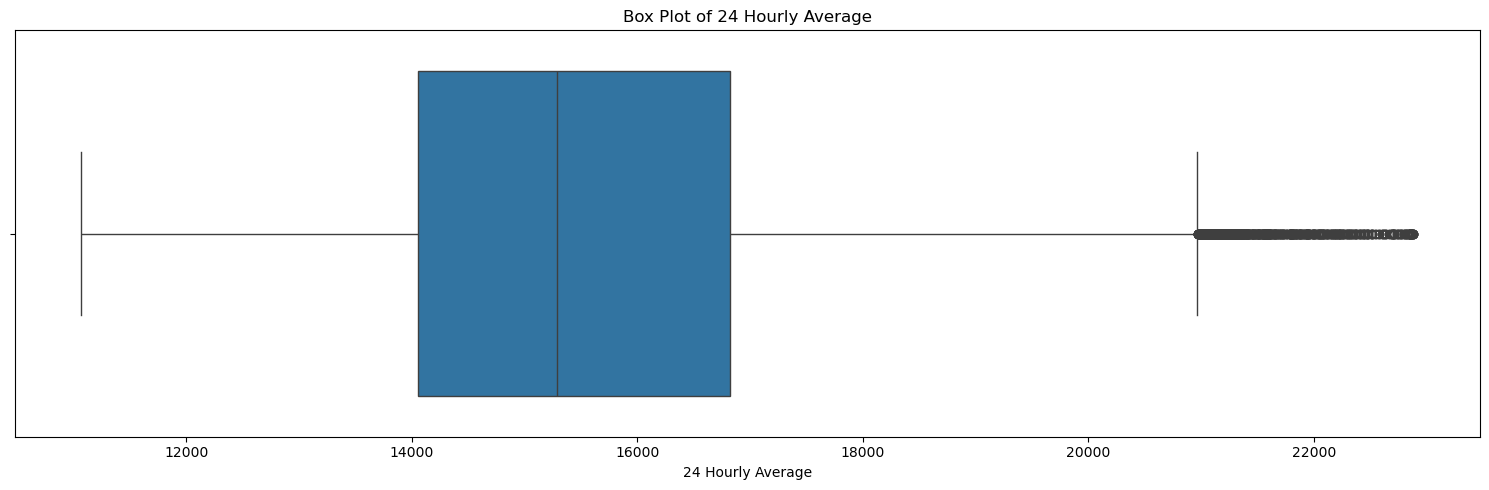

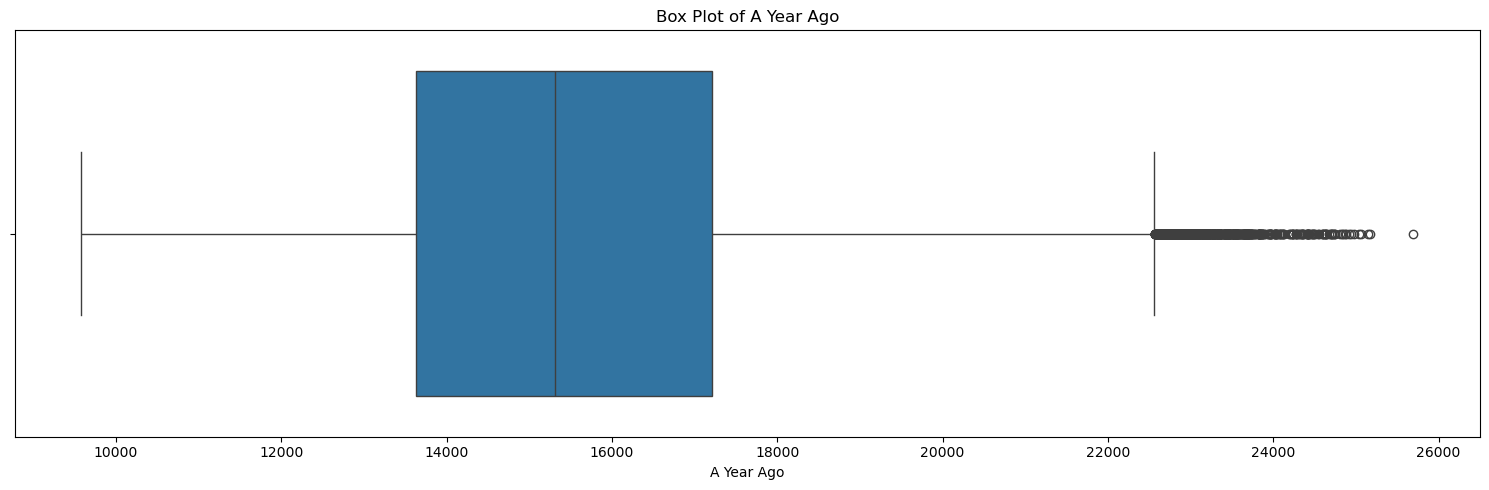

In [40]:
# program code to visualize the outliers in each column

numerical_columns = initial_dataset.select_dtypes(include=['number']).columns

# Number of columns to display in one figure
num_columns_per_plot = 1

# Set up the matplotlib figure
for i in range(0, len(numerical_columns), num_columns_per_plot):
    plt.figure(figsize=(15, num_columns_per_plot * 5))  # Adjust the height based on the number of columns per plot
    subset_columns = numerical_columns[i:i + num_columns_per_plot]

    for j, column in enumerate(subset_columns):
        plt.subplot(num_columns_per_plot, 1, j + 1)
        sns.boxplot(data=initial_dataset, x=column)
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

#### Observation
From the Box plots above, outliers were detected in "AEP_MW" feature column and lagged feature columns of "Twelve Hours Ago" and "A Year Ago" respectively.

Note: No outliers detected for all breakout features of "Datetime" feature column because each Datetime observation was unique.

#### Handling the Outliers Using Z-Score

In [43]:
def remove_outliers_zscore(df, threshold=3):
    """
    Identifies and removes outliers from a DataFrame based on Z-scores.
    
    Args:
        df (pandas.DataFrame): Input dataset (features and target).
        threshold (float): Z-score threshold for identifying outliers (default is 3).
    
    Returns:
        df_cleaned (pandas.DataFrame): Cleaned DataFrame with outliers removed.
    """
    # Calculate Z-scores for features and targets
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    
    # Identify outliers (True for rows where any feature's Z-score > threshold)
    outliers = (z_scores > threshold).any(axis=1)
    
    # Remove rows where outliers exist
    df_cleaned = df[~outliers]
    
    return df_cleaned




In [44]:
# calling the remove_outliers_zscore() function to remove the outliers in the "initial_dataset" dataframe
initial_dataset = remove_outliers_zscore(initial_dataset)
initial_dataset # displays the modified outlier-free dataset

,Energy_Consumption,Hour,Month,Year,12 Hourly Average,24 Hourly Average,A Year Ago
Datetime,,,,,,,
2004-10-16 06:00:00,12127.0,6,10,2004,13603.750000,14516.500000,12379.0
2004-10-16 07:00:00,12628.0,7,10,2004,13356.916667,14456.333333,11935.0
2004-10-16 08:00:00,13377.0,8,10,2004,13151.000000,14381.666667,11692.0
2004-10-16 09:00:00,14062.0,9,10,2004,13026.583333,14325.458333,11597.0
2004-10-16 10:00:00,14577.0,10,10,2004,12977.833333,14283.500000,11681.0
...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,20,8,2018,17407.583333,15589.541667,18441.0
2018-08-02 21:00:00,17303.0,21,8,2018,17613.333333,15624.791667,18625.0
2018-08-02 22:00:00,17001.0,22,8,2018,17754.333333,15658.291667,18860.0


In [45]:
# initial_dataset['AEP_MW'] = pd.to_numeric(initial_dataset['AEP_MW'], errors='coerce')
# initial_dataset

### Visualizing Feature to Target Relationship Using Box Plots

##### Energy Consumption (MW) by Hour

Text(0.5, 1.0, 'MW by hour')

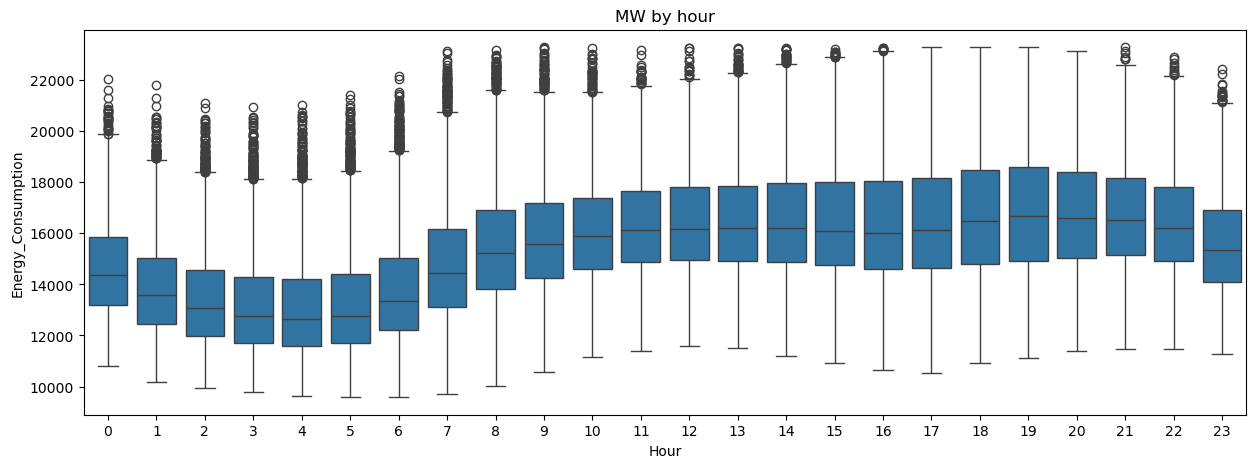

In [48]:
figure, ax = plt.subplots(figsize = (15, 5)) # creates subplots
sns.boxplot(data = initial_dataset, x = "Hour", y = "Energy_Consumption") # plots energy consumed against hour
ax.set_title("MW by hour") # title of plot

##### Energy Consumption (MW) by Month

Text(0.5, 1.0, 'MW by Month')

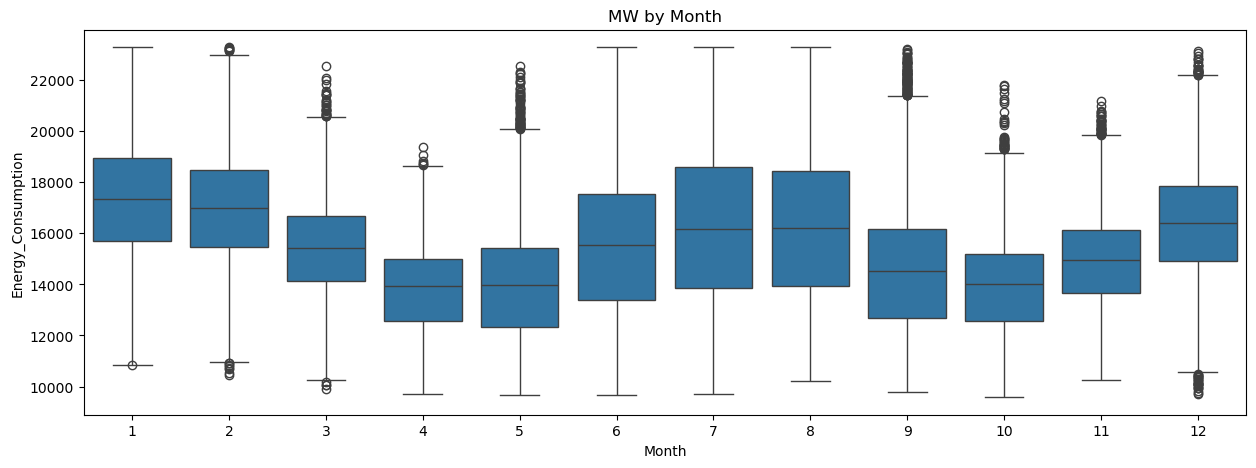

In [50]:
figure, ax = plt.subplots(figsize = (15, 5)) # creates subplots
sns.boxplot(data = initial_dataset, x = "Month", y = "Energy_Consumption") # plots energy consumed against hour
ax.set_title("MW by Month") # title of plot

##### Energy Consumption (MW) by Year

Text(0.5, 1.0, 'MW by Year')

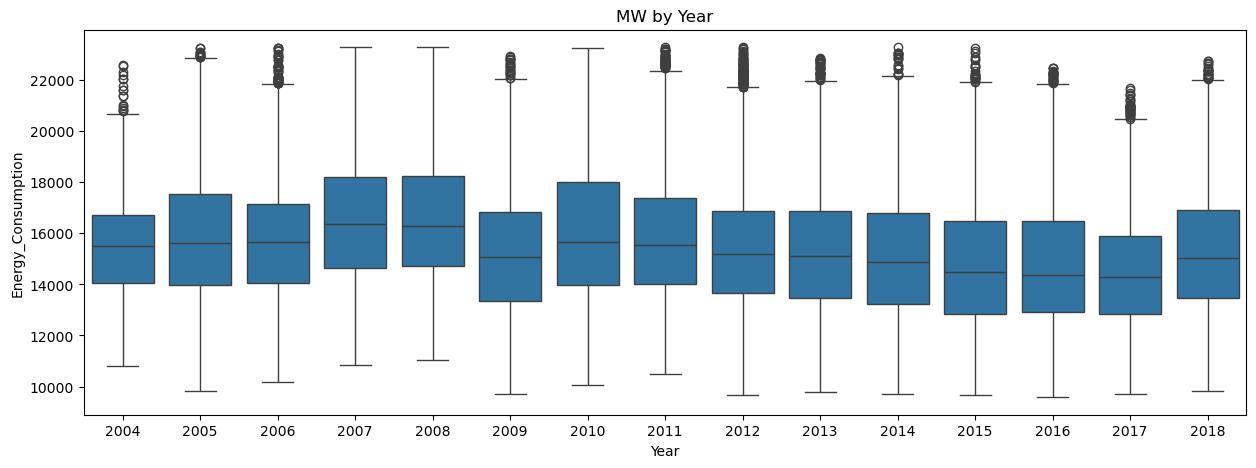

In [52]:
figure, ax = plt.subplots(figsize = (15, 5)) # creates subplots
sns.boxplot(data = initial_dataset, x = "Year", y = "Energy_Consumption") # plots energy consumed against hour
ax.set_title("MW by Year") # title of plot

### Data Splitting and Preparation

In [54]:
train = initial_dataset.loc[initial_dataset.index < "2018-01-01"] # sets train set to all values recorded before "2022-06-01"
test = initial_dataset[initial_dataset.index >= "2018-01-01"] # sets test set to all values recorded on or after "2022-06-01"

print(f"""
Train set: {train}, 
Test Set: {test}
""") # displays the train and test sets


Train set:                      Energy_Consumption  Hour  Month  Year  12 Hourly Average  \
Datetime                                                                        
2004-10-16 06:00:00             12127.0     6     10  2004       13603.750000   
2004-10-16 07:00:00             12628.0     7     10  2004       13356.916667   
2004-10-16 08:00:00             13377.0     8     10  2004       13151.000000   
2004-10-16 09:00:00             14062.0     9     10  2004       13026.583333   
2004-10-16 10:00:00             14577.0    10     10  2004       12977.833333   
...                                 ...   ...    ...   ...                ...   
2017-12-31 19:00:00             19608.0    19     12  2017       18655.000000   
2017-12-31 20:00:00             19442.0    20     12  2017       18721.333333   
2017-12-31 21:00:00             19323.0    21     12  2017       18752.083333   
2017-12-31 22:00:00             19092.0    22     12  2017       18738.583333   
2017-12-31 23:00

### Plots Training and Test Sets on the Same Plot Using Different Colors

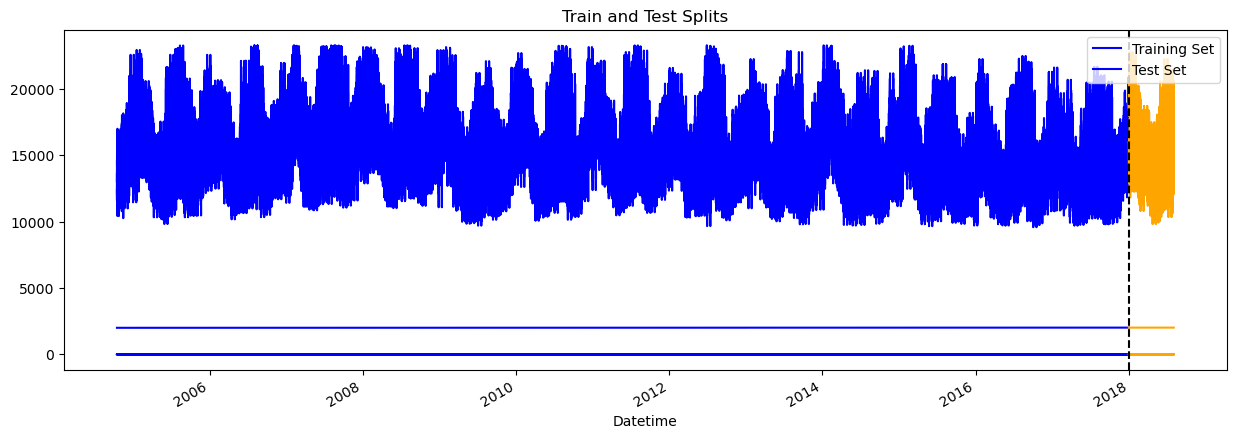

In [56]:
figure, ax = plt.subplots(figsize = (15, 5)) # creates subplots
train.plot(ax = ax, label = "Training Set", title = "Train and Test Splits", color = 'blue') # blue color
test.plot(ax = ax, label = "Test Set", color = 'orange') # orange color
ax.axvline("2018-01-01", color = "black", ls = "--") # adds a black dashed vertical line to the plot to show the dermacation between the train and test splits
ax.legend(["Training Set", "Test Set"]) # adds a legend to the plot
plt.show() # displays the graph

### Specifies and Assigns Features That will be in the Train and Test Sets Separately

In [58]:
# sets all independent varaibles to "feature" variable

features = ['Hour', 'Month', 'Year', '24 Hourly Average', '12 Hourly Average', 'A Year Ago']

# sets the dependent variable to the "target" variable
target = 'Energy_Consumption'

In [59]:
# creates the X_train, Y_train, X_test and Y_test variables

X_train_split = train[features]
Y_train_split = train[target]

X_test_split = test[features]
Y_test_split = test[target]

### Building the Extreme Gradient Boosting Model

### Initializes the Model with its Hyper-parameters and Starts Training 

In [62]:


regression_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 2400, gamma = 1.0, early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 10, subsample= 0.1, colsample_bytree = 1.0, reg_alpha = 50.0, reg_lambda = 0.0, tree_method='hist') # creates the XGBoost Regression Model Object

# performs the training
  
regression_model.fit(X_train_split, Y_train_split,
    eval_set = [(X_train_split, Y_train_split), (X_test_split, Y_test_split)],
                     verbose = 20)
    


[0]	validation_0-rmse:2546.32066	validation_1-rmse:2534.52418
[20]	validation_0-rmse:2499.73567	validation_1-rmse:2488.56408
[40]	validation_0-rmse:2454.13847	validation_1-rmse:2443.40807
[60]	validation_0-rmse:2409.49694	validation_1-rmse:2399.39440
[80]	validation_0-rmse:2365.71534	validation_1-rmse:2355.94726
[100]	validation_0-rmse:2322.85682	validation_1-rmse:2313.54463
[120]	validation_0-rmse:2280.88421	validation_1-rmse:2271.98834
[140]	validation_0-rmse:2239.79684	validation_1-rmse:2231.32164
[160]	validation_0-rmse:2199.52325	validation_1-rmse:2191.63969
[180]	validation_0-rmse:2160.05559	validation_1-rmse:2152.50208
[200]	validation_0-rmse:2121.37464	validation_1-rmse:2114.32659
[220]	validation_0-rmse:2083.56661	validation_1-rmse:2077.18976
[240]	validation_0-rmse:2046.52218	validation_1-rmse:2040.66297
[260]	validation_0-rmse:2010.22496	validation_1-rmse:2004.79617
[280]	validation_0-rmse:1974.75121	validation_1-rmse:1969.60952
[300]	validation_0-rmse:1940.02573	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Displays Importance Values Based on the Percentage at Which Each Feature was Used in Training the Model

In [64]:
# creates a dataframe of importance values

important_values_dataframe = pd.DataFrame(data = regression_model.feature_importances_, index = regression_model.feature_names_in_, columns = ["Importance Values"])
important_values_dataframe # displays the dataframe



,Importance Values
Hour,0.309054
Month,0.079163
Year,0.011803
24 Hourly Average,0.450456
12 Hourly Average,0.134630
A Year Ago,0.014893


### Visualizes a Bar Plot of the Importance Values Sorted in Descending Order of Importance

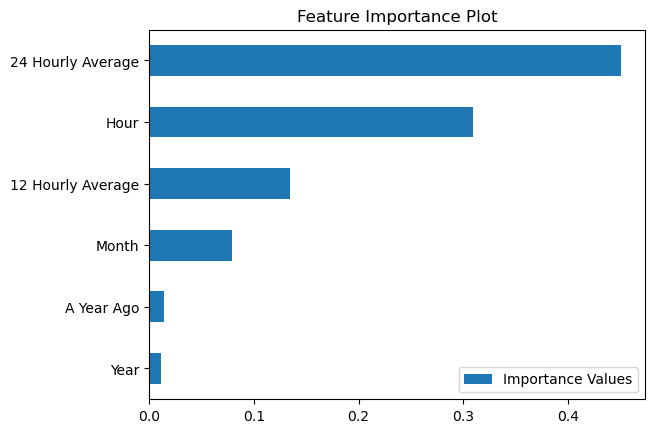

In [66]:
important_values_dataframe.sort_values("Importance Values").plot(kind = "barh", title = "Feature Importance Plot")
plt.show() # displays the plot

### Using the Trained Model to Forecast on a Test Set

In [68]:
# performs prediction on the Test Set

test["prediction"] = regression_model.predict(X_test_split)
initial_dataset = initial_dataset.merge(test[["prediction"]], how = "left", left_index = True, right_index = True)
initial_dataset

## NOTE: The test["prediction"] is the y_pred (i.e the predicted values of the model) while test["AEP_MW"] is the y_true (i.e the actual values the model is trying to predict).

C:\Users\hp\AppData\Local\Temp\ipykernel_10124\4087145002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"] = regression_model.predict(X_test_split)


,Energy_Consumption,Hour,Month,Year,12 Hourly Average,24 Hourly Average,A Year Ago,prediction
Datetime,,,,,,,,
2004-10-16 06:00:00,12127.0,6,10,2004,13603.750000,14516.500000,12379.0,NaN
2004-10-16 07:00:00,12628.0,7,10,2004,13356.916667,14456.333333,11935.0,NaN
2004-10-16 08:00:00,13377.0,8,10,2004,13151.000000,14381.666667,11692.0,NaN
2004-10-16 09:00:00,14062.0,9,10,2004,13026.583333,14325.458333,11597.0,NaN
2004-10-16 10:00:00,14577.0,10,10,2004,12977.833333,14283.500000,11681.0,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,20,8,2018,17407.583333,15589.541667,18441.0,17604.478516
2018-08-02 21:00:00,17303.0,21,8,2018,17613.333333,15624.791667,18625.0,17244.017578
2018-08-02 22:00:00,17001.0,22,8,2018,17754.333333,15658.291667,18860.0,16852.048828


##### Energy Consumption (MW) by Datetime for Truth and Predicted Data Comparison


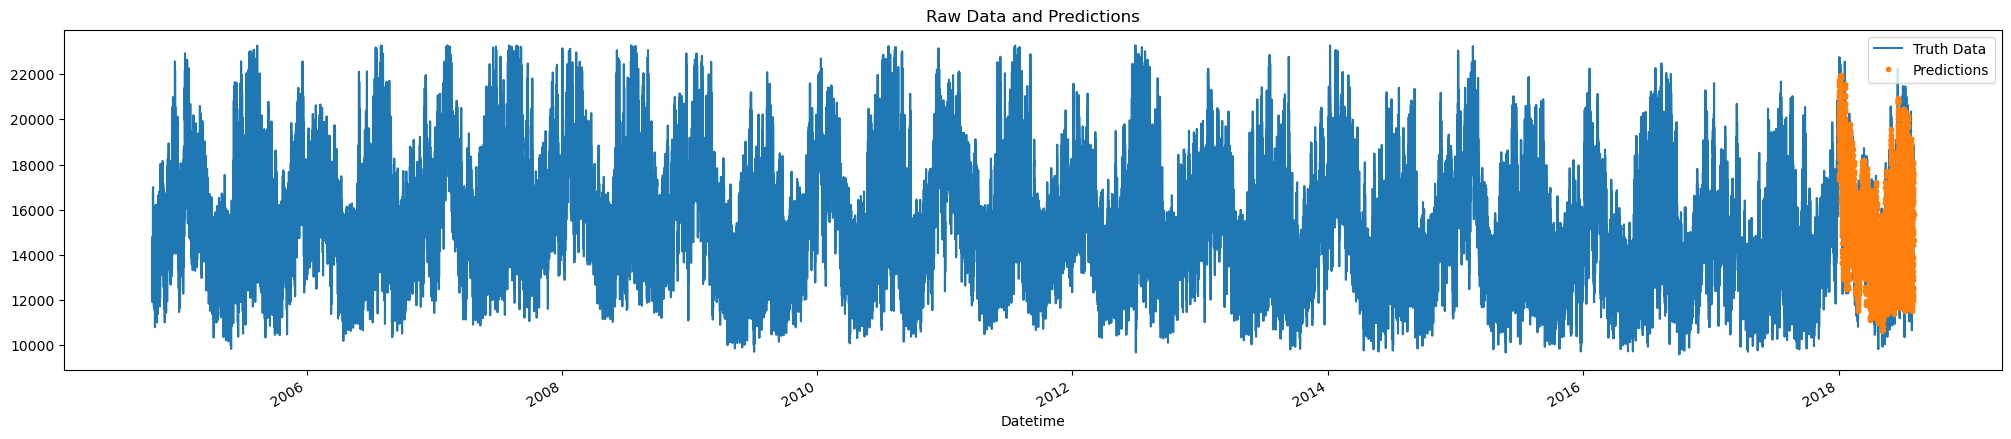

In [70]:
# plotting the predictions
ax = initial_dataset[["Energy_Consumption"]].plot(figsize = (25,5))
initial_dataset["prediction"].plot(ax=ax, style = ".")
plt.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Data and Predictions")
plt.show()


##### Energy Consumption (MW) by Datetime of a Week for Truth and Predicted Data Comparision

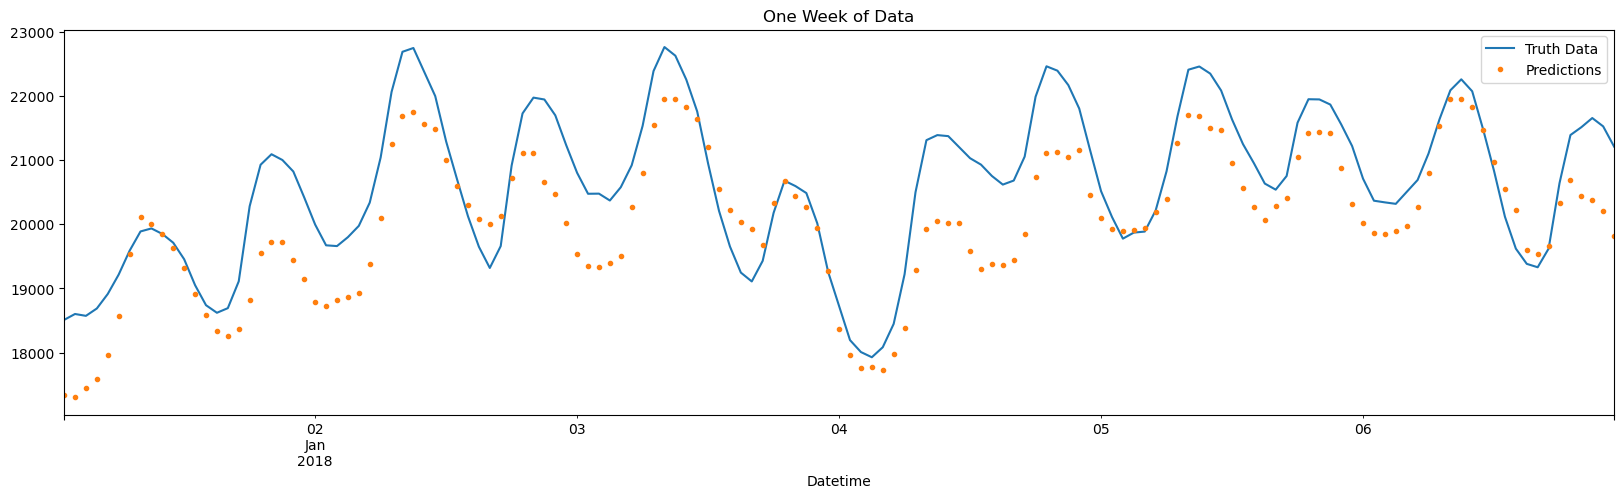

In [72]:
# visualizes one week of the prediction data

ax = initial_dataset.loc[(initial_dataset.index > "2018-01-01") & (initial_dataset.index < "2018-01-07")]["Energy_Consumption"].plot(figsize = (20, 5), title = "One Week of Data") 

initial_dataset.loc[(initial_dataset.index > "2018-01-01") & (initial_dataset.index < "2018-01-07")]["prediction"].plot(style = ".") 
plt.legend(["Truth Data", "Predictions"])
plt.show()


### Evaluation Metrics

### Calculates the Mean and Root Mean Squared Errors

In [75]:
# converts the predicted and actual values columns to a numpy array and asigns it to y_test and y_pred respectively.
y_test, y_pred = np.array(test[target]), np.array(test["prediction"]) 

# computes the mean squared error (MSE)
mean_sqr_error = mean_squared_error(y_test, y_pred)

# computes the root mean squared error (RMSE)
root_mean_sqr_error = np.sqrt(mean_sqr_error)

# computes the mean absolute error (MAE)
mean_absolute_error = mean_absolute_error(y_test, y_pred)

# computes the mean absolute percentage error (MAPE)

mean_absolute_percentage_error = np.mean(np.abs((y_test - y_pred) /  y_test)) * 100 

# computes the coefficient of determination(r2_score)

coeff_of_determination = r2_score(y_test, y_pred)

# displays the mean_squared_error to 3dp

print(f"Mean Squared Error: {mean_sqr_error: 0.3f}")

# displays the root mean squared error to 3dp

print(f"Root Mean Squared Error: {root_mean_sqr_error: 0.3f}")

# displays the mean absolute error to 3dp 

print(f"Mean Absolute Error: {mean_absolute_error: 0.3f}")

# displays the mean absolute percentage error to 3dp 

print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error: 0.3f}")

# displays the coefficient of determination (r2_score) to 3dp 

print(f"Coefficient of Determination (r2_score): {coeff_of_determination: 0.3f}")

Mean Squared Error:  377558.839
Root Mean Squared Error:  614.458
Mean Absolute Error:  481.880
Mean Absolute Percentage Error:  3.196
Coefficient of Determination (r2_score):  0.941


### Creates a New Column for the Prediction Errors and their Respective Dates

In [77]:
# creates a new column "error" that stores the error inform of its absolute value

test["error"] = np.abs(test[target] - test["prediction"])

# creates a new column "date" that stores the dates of all instances in the test dataset

test["date"] = test.index.date



C:\Users\hp\AppData\Local\Temp\ipykernel_10124\2873479225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["error"] = np.abs(test[target] - test["prediction"])
C:\Users\hp\AppData\Local\Temp\ipykernel_10124\2873479225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["date"] = test.index.date


### Displays the Worst Average Prediction Error for a Day in Descending Order

In [79]:
# groups the data by date and computes the average error for each day in a descending order

test.groupby("date")["error"].mean().sort_values(ascending = False)

date
2018-07-08    1022.317952
2018-06-17    1004.865723
2018-01-04     983.602783
2018-07-01     975.002726
2018-07-09     974.589437
                 ...     
2018-08-03     168.026367
2018-04-23     164.727905
2018-06-20     155.404907
2018-02-06     137.512695
2018-06-25     136.817464
Name: error, Length: 215, dtype: float64

### Displays the Worst Average Prediction Error for a Day in Ascending Order

In [81]:
# groups the data by date and computes the average error for each day in a ascending order

test.groupby("date")["error"].mean().sort_values(ascending = True)

date
2018-06-25     136.817464
2018-02-06     137.512695
2018-06-20     155.404907
2018-04-23     164.727905
2018-08-03     168.026367
                 ...     
2018-07-09     974.589437
2018-07-01     975.002726
2018-01-04     983.602783
2018-06-17    1004.865723
2018-07-08    1022.317952
Name: error, Length: 215, dtype: float64

### Saving the Model 

In [83]:
## From the data, worse day of prediction was on 2022-06-27 and best day of prediction was on 2022-06-06

In [84]:
joblib.dump(regression_model, 'Time Series Energy Consumption Model.pkl') # saves the model to the specified file path

['Time Series Energy Consumption Model.pkl']

### Saving the Dataset with Predictions to a CSV File

In [86]:
initial_dataset.to_csv('Predictions.csv')

In [87]:
print("© Rizama Victor")

© Rizama Victor
